<b><font size="4">Daniel Leal</font></b><br> 
*Assessing ML4T Learners*<br>
*Stock Trader Bot*<br><br>


### Assess Learners

<b>Description:</b> In Tucker Balch's ML4T university course, he instructs his students to test their learners and compare each learners performance on the Istanbul.csv dataset. For more information, refer to the template section located in this [link](https://quantsoftware.gatech.edu/Spring_2020_Project_3:_Assess_Learners#Implement_DTLearner_.2815_points.29).

<b>Recommendation:</b>
The dataset for [Istanbul.csv](https://raw.githubusercontent.com/ntrang086/ml_trading_assess_learners/master/Data/Istanbul.csv) 
is recommended to be done by downloading the file and including it in the repo folder we are working on.

<b>Istanbul.csv:</b> "This dataset includes the returns of multiple worldwide indexes for a number of days in history. The overall objective is to predict what the return for the MSCI Emerging Markets (EM) index will be on the basis of the other index returns. Y in this case is the last column to the right, and the X values are the remaining columns to the left (except the first column which is the date)." <br><br>

### Table of Contents
&emsp; 1) Train and Evaluate Decision Tree Learner

&emsp; 2) Train and Evaluate Random Forest Learner

&emsp; 3) Train and Evaluate Bootstrap Aggregating Learner

<br><br><br>

In [1]:
# Import dependencies.
import numpy as np
import matplotlib.pyplot as plt
from Utilities import *

# Filter out warning messages from jupyter notebook.
import warnings
warnings.filterwarnings('ignore')

In [2]:
from Learners import LinRegLearner as LRL
from Learners import KNearestNeighborLearner as KNN
from Learners import DecisionTreeLearner as DTL
from Learners import RandomTreeLearner as RTL
from Learners import BootstrapAggregatingLearner as BAL

In [3]:
# Read a file and split into training and testing (60-40).
trainX, trainY, testX, testY = ProcessData("Data/Istanbul.csv", trainSize=0.6)

# Specify max leaf size value along with iterations per leaf size.
maxLeafSize = 200
iterations = 20


Removing the header...
Header removed.


Removing non-numerical column...
Non-numerical column removed.



<br><br>
# Training and Evaluating Learners
<br>

### Description:
Here we will now train and test our learners on various leaf sizes across numerous iterations. Basically, for every leaf number (maxLeafSize=200), we will perform a certain amount of iterations (iterations=20) where we will train our model on a given data point using the function AddEvidence. Once we have trained it using the entire training data separated for it, we then call the Query function to use our model to predict its prices based on a given testing dataset. Furthermore, we store our predictions in a variable called predY and we compare the prediction from our Query function to the actual point from that date. We do this in order to calculate the root mean squared error to effectively perform an analysis on our learner's performance. After, we will compare the Root Mean Squared Errors (RMSEs) between the training set and test set in order to locate any type of overfitting and underfitting amongst our models. 
<br>

### Process:
For leaf sizes ranging from 0 to maxLeafSize, we do the following: 

1) Split the data into training and testing using a 60-40 split.

2) Train the model using the AddEvidence function.  

3) Test the models predicitions using the Query function. 

4) Compare the prediction to the actual testing point using root mean squared errors and correlations function to measure our predictions behavior to the actual behavior that the testing data consisted of. 

<b>**Steps 1 through 4 is performed a number of times based on the iterations value (currently 20) and then the average of the iterations RMSEs and Correlations is calculated and then used as the value to be graphed for the specific leaf size iteration. **</b>

5) The average of all RMSEs and correlations of the 20 iterations for a given leaf size is the plotted on a graph to demonstrate the performance of our model based on the averages of every leaf size. 

6) Visualize the results by plotting the RMSEs of the predictions vs. the actual testing data on the Y-Axis along with the leaf size on the X-Axis. 

7) Visualize more results by plotting the correlations values of the predictions vs. the actual testing data on the Y-Axis along with the leaf size on the X-Axis.

8) Analyze the results of our model and identify best performing leaf sizes for each model as well as trends with respect to over and underfitting.
<br><br><br>

<br><br><br>
### 1) Train and Evaluate Decision Tree Learner

<b>Brief Description:</b> We will now train and test our DecisionTreeLearner on various leaf sizes. A decision tree is helpful in stock predictions because it allows you to evaluate your options. Decision trees in general are excellent tools for helping choose between several courses of action. In this case, our AddEvidence function calls our recursive BuildTree function that serves to select the best feature when given a training data set. This selection of a best feature is important because it allows for a more organized construction of a decision tree to be used when predicitng a stock price. When it comes to the prediction, the decision tree model will call the Query function that will then call the recursive TreeSearch function that will traverse through the decision tree and select what it believes to be the most accurate prediction based on the tree constructed on the best features of the training data. After, we will compare the Root Mean Squared Errors (RMSEs) between the training set and test set in order to locate any type of overfitting amongst our models. 

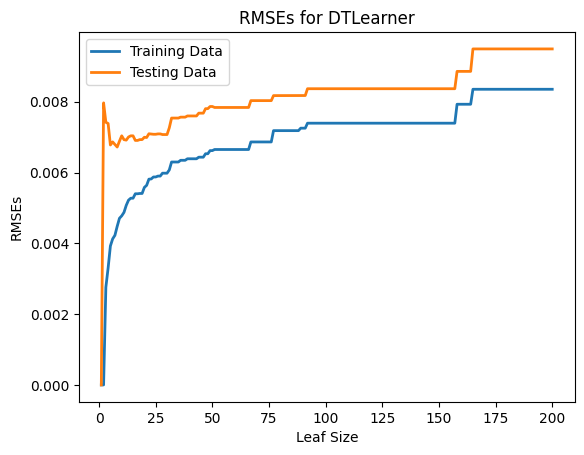

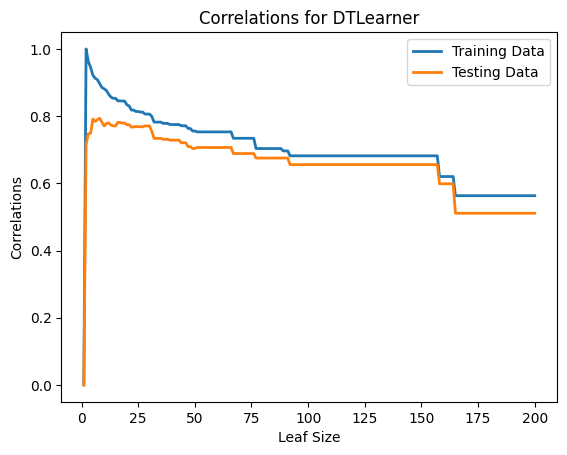

In [4]:
def DTLearnerTest():
    # Calculate RMSEs and Correlations.
    trainRmseMean, testRmseMean, trainCorrMed, testCorrMed = TrainTestLearner(
    trainX, trainY, testX, testY, DTL, iterations=iterations,
    maxLeafSize=maxLeafSize)
    
    # Visualize the RMSEs.
    VisualizeResults(trainRmseMean, testRmseMean, title="RMSEs for DTLearner",
                xLabel="Leaf Size", yLabel="RMSEs", xAxisLen=maxLeafSize)
    
    #Visualize correlations.
    VisualizeResults(trainCorrMed, testCorrMed, "Correlations for DTLearner",
                xLabel="Leaf Size", yLabel="Correlations", xAxisLen=maxLeafSize)
    
if __name__ == '__main__':
    DTLearnerTest()

<br><br><b>Conclusions from Results:</b> Based on the RMSEs visualization, it is clear that within the first few leaf sizes there is a huge overfitting difference with respect to the RMSEs. Furthermore, as we increase in leaf sizes after approximately 15 to 20 leafs, we see that the RMSEs begin to increase, meaning there is less accuracy in our predictions. Nevertheless, the RMSE values are very low, meaning our model performed very well. Based on the correlations visualization, we can also see that the highest correlation amongst the training and testing was evident around a leaf size of about 30. This is also where we had the closest, lowest RMSEs. As we continue with increasing leaf sizes, we also see that the model's correlations values decrease significantly. In conclusion, the best leaf size value based on the correlation and RMSE values of the Testing and Training data, seems to be near the 30 leaf size range! <br><br>

<br><br><br>
### 2) Train and Evaluate Random Tree Learner

<b>Brief Description:</b> We will now train and test our RandomTreeLearner on various leaf sizes. A random tree follows practically the same process as a decision tree. However, the difference with this learner is that it does not select the best feature unlike a Decision Tree Learner. In this case, as the name implies, it selects a random feature to base its tree construction. Furthermore, random trees utilizes sort of a bagging method to combine multiple random decision trees. This is really good for predictions because simply put, random trees merges the decision trees together to get a more accurate and stable prediction. This model follows the same funciton calling as the DecisionTreeLearner, the only difference is that within the BuildTree, the Random forest adds additional randomness to the model while growing the trees. This means that instead of searching for the most important feature when splitting a node, it will for the best feature amongst a random subset of features!

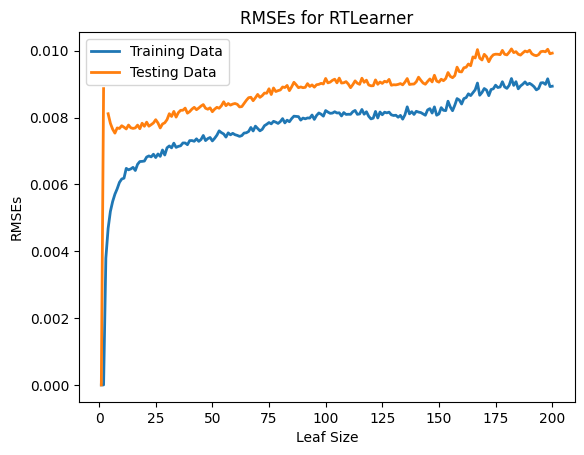

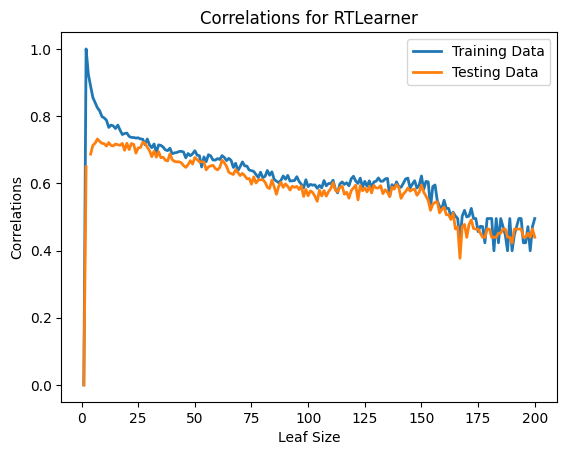

In [5]:
def RTLearnerTest():
    # Calculate RMSEs and Correlations.
    trainRmseMean, testRmseMean, trainCorrMed, testCorrMed = TrainTestLearner(
    trainX, trainY, testX, testY, RTL, iterations=iterations,
    maxLeafSize=maxLeafSize)
    
    # Visualize the RMSEs.
    VisualizeResults(trainRmseMean, testRmseMean, title="RMSEs for RTLearner",
                xLabel="Leaf Size", yLabel="RMSEs", xAxisLen=maxLeafSize)
    
    #Visualize correlations.
    VisualizeResults(trainCorrMed, testCorrMed, "Correlations for RTLearner",
                xLabel="Leaf Size", yLabel="Correlations", xAxisLen=maxLeafSize)
    
if __name__ == '__main__':
    RTLearnerTest()

<br><br><b>Conclusions from Results:</b> Overall, based on the RMSEs visualization, the algorithm performed extremely well with lower leaf sizes as seen by its lower value RMSEs. Furthermore, it appears that around a leaf size of about 25 it had the closest values for the training and testing values while still holding a low RMSE. This algorithm, based on the RMSE, performed more accurate predictions than our Decision tree model! Based on the correlations visualization, it is evident that the best correlation values and the closest the training and testing data correlations value was also around a leaf size of 25. In conclusion, this algorithm, when consisting of 25 leaves, performed better than the decision tree learner did at the leaf size of 30.

<br><br><br>
### 3) Train and Evaluate Boostrap Aggregating Learner

<b>Brief Description:</b> We will now train and test our BootStrapAggregatingLearner across varying leaf sizes. This algorithm will surely take a significantly large amount of time in computing. We can make this conclusion because the Bootstrap aggregating algorithm basically serves to perform a bagging technique on a given algorithm. The bootstrap aggregating learner intakes another learner such as a DecisionTree, RandomTree, LinReg, etc. From this algorithm, it will compute this algorithm over a number 'bag' times, in this case it is our maxBagSize value. From this, it will compute the average of all of the algorithms averages. This is very useful for predicitons because it significantly decreases overfitting because it reduces variance amongst the Query data points and aims to improve the overall stablities of our predicitons.<br>

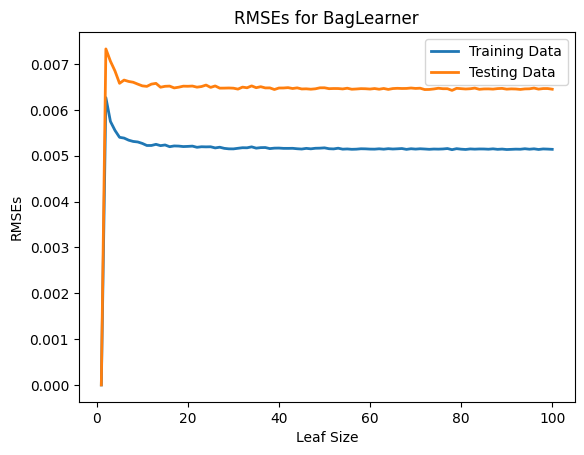

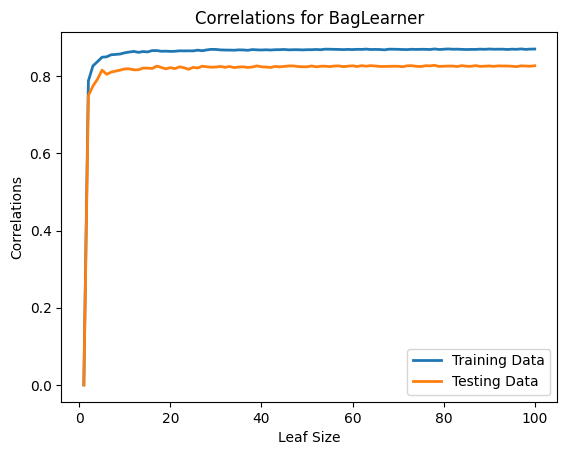

In [6]:
def BagLearnerTest():
    maxBagSize=100
    
    # Calculate RMSEs and Correlations.
    trainRmseMean, testRmseMean, trainCorrMed, testCorrMed = TrainTestLearner(
    trainX, trainY, testX, testY, BAL, maxBagSize=maxBagSize,
    iterations=iterations, learner=DTL, leafSize=25)
    
    # Visualize the RMSEs.
    VisualizeResults(trainRmseMean, testRmseMean, title="RMSEs for BagLearner",
                xLabel="Leaf Size", yLabel="RMSEs", xAxisLen=maxBagSize)
    
    #Visualize correlations.
    VisualizeResults(trainCorrMed, testCorrMed, "Correlations for BagLearner",
                xLabel="Leaf Size", yLabel="Correlations", xAxisLen=maxBagSize)
    
if __name__ == "__main__":
    BagLearnerTest()

<br><br><b>Conclusions from Results:</b> INSTEAD OF LEAF SIZE FOR THE-X AXIS, IT SHOULD BE BAGSIZE!! This algorithm did amazing! As we can see, the RMSE values are incredibly low in comparison to our other models. Furthermore, as expected, as the bag size is increased, the accuracy and correlation also increased. This is because the more bagging that is implemented, the bigger the decision tree is in this case. This means that because the tree is so collosal, the predicitons are much more accuracy in which we can see that the overfitting is significantly better with respect to accuracy and stability. Overall, the highest bag size (100), had the lowest RMSE and best correlation values!